<a href="https://colab.research.google.com/github/ihyaulumuddin044/machineLearning/blob/main/makeSimpleDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# generate dataset
!pip install mglearn
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import pandas as pd
import sklearn



# from IPython.display import display


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.4 MB/s eta 0:00:00


X.shape: (26, 2)


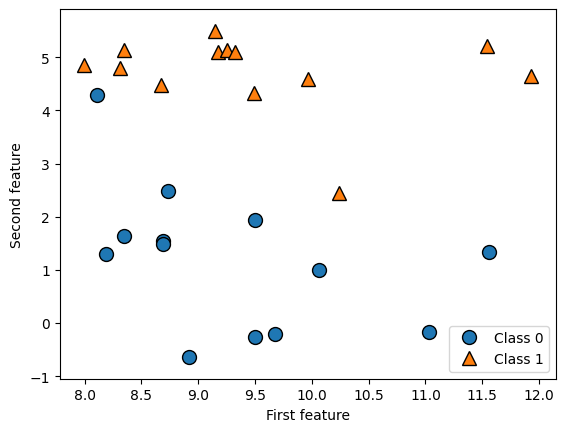

In [ ]:
X,y =  mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Untuk mengilustrasikan algoritme regresi, kita akan menggunakan dataset sintetik wave. Dataset wave memiliki satu fitur input dan variabel target kontinu (atau respons) yang ingin kita modelkan. Plot yang dibuat di sini (Gambar 2-3) menunjukkan fitur tunggal di sumbu x dan target regresi (output) di sumbu y:

Text(0, 0.5, 'Target')

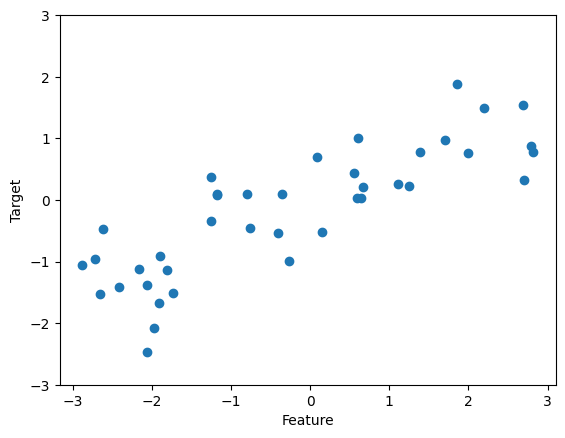

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")


contoh peengklasifikasian data kanker. mengklasifikasikan apakah sebuah kanker jinak atau tidak

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

print("Shape of cancer data: {}".format(cancer.data.shape))

print("Sample counts per class:\n{}".format(
 {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

print("Feature names:\n{}".format(cancer.feature_names))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Selanjutnya, kita akan menggunakan dataset regresi dunia nyata, yaitu Boston Housing dataset. Tugas yang terkait dengan dataset ini adalah memprediksi nilai median rumah di beberapa lingkungan di Boston pada tahun 1970-an

In [ ]:
from sklearn.datasets import load_diabetes

# Memuat dataset Diabetes
diabetes = load_diabetes()
print("Data shape: {}".format(diabetes.data.shape))

X, y = mglearn.datasets.make_wave(n_samples=100)  # Contoh lain dari mglearn
print("X.shape: {}".format(X.shape))





Data shape: (442, 10)
X.shape: (100, 1)


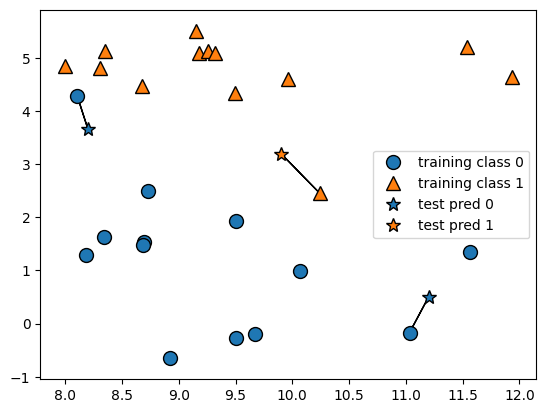

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=1)




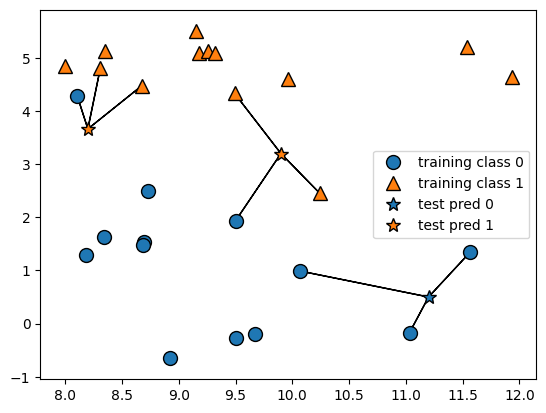

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)


Sekarang mari kita lihat bagaimana kita dapat menerapkan algoritma k-nearest neighbors menggunakan scikit-learn.

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


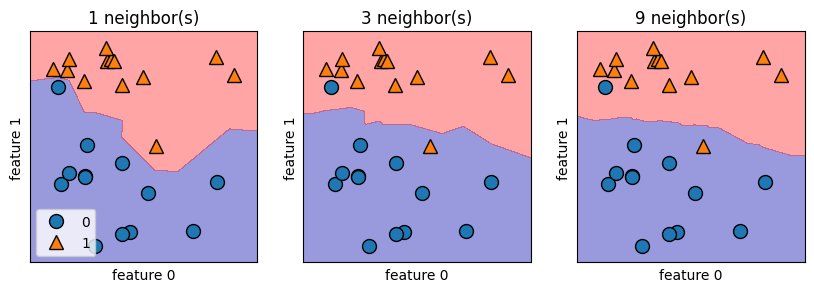

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

print("Test set predictions: {}".format(clf.predict(X_test)))

print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

# visualisasi penyebaran data

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
 # the fit method returns the object self, so we can instantiate
 # and fit in one line
 clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{} neighbor(s)".format(n_neighbors))
 ax.set_xlabel("feature 0")
 ax.set_ylabel("feature 1")
axes[0].legend(loc=3)



mecoba memprediksi data kanker payudara menggunakan dataset asli

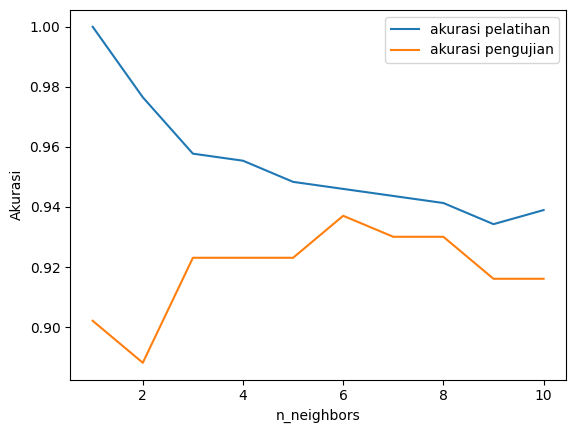

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# coba n_neighbors dari 1 hingga 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # membangun model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # mencatat akurasi set pelatihan
    training_accuracy.append(clf.score(X_train, y_train))
    # mencatat akurasi generalisasi
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="akurasi pelatihan")
plt.plot(neighbors_settings, test_accuracy, label="akurasi pengujian")
plt.ylabel("Akurasi")
plt.xlabel("n_neighbors")
plt.legend()




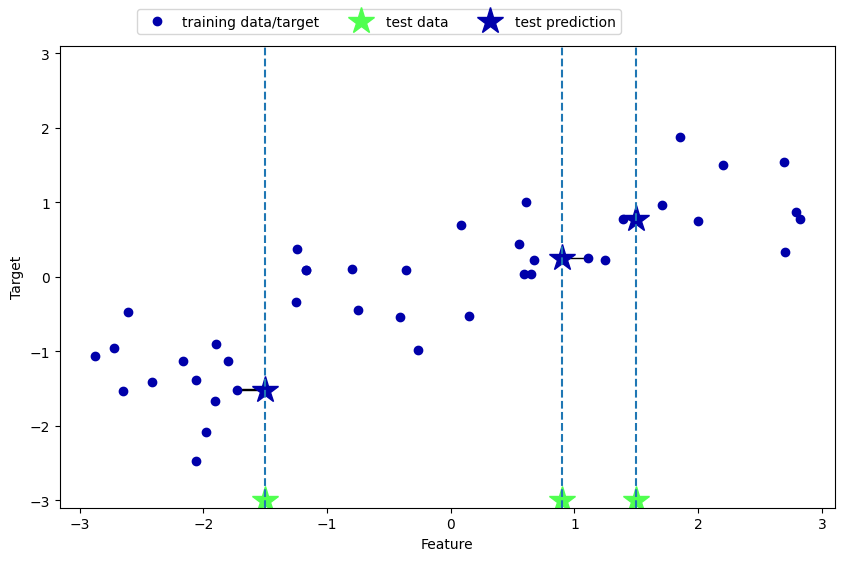

In [ ]:
# menggukan 1 tetangga terdekat
mglearn.plots.plot_knn_regression(n_neighbors=1)


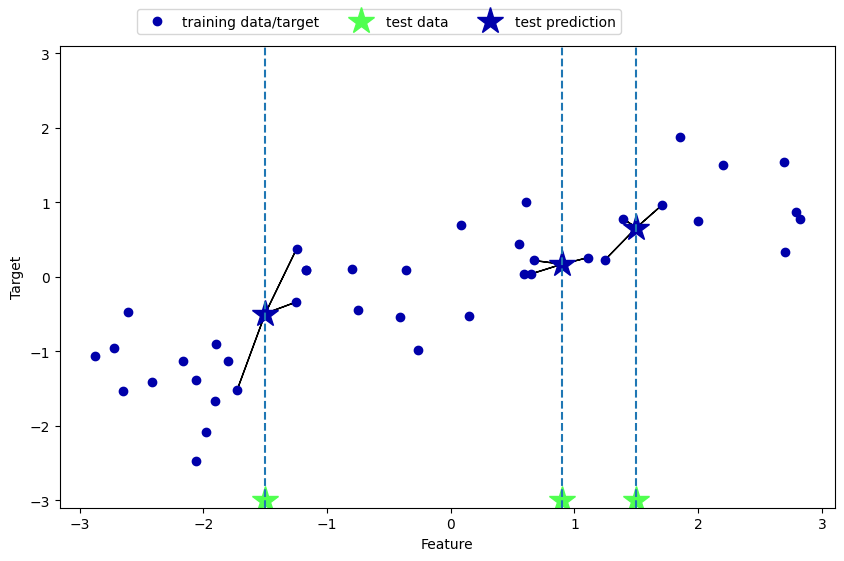

In [ ]:
# menggunakan 3 tetangga terdekat
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

print("Test set predictions:\n{}".format(reg.predict(X_test)))

print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))


Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


analisa regresi pada Knn

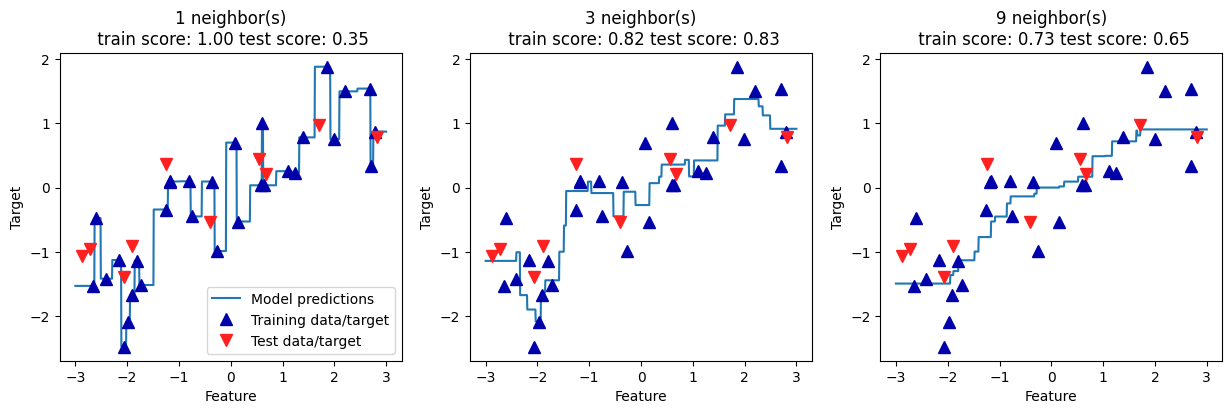

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # make predictions using 1, 3, or 9 neighbors
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Feature")
 ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
 "Test data/target"], loc="best")

w[0]: 0.393906  b: -0.031804


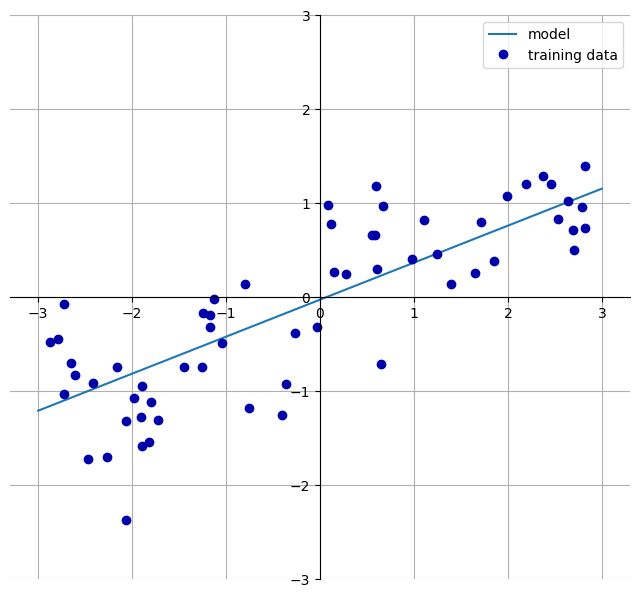

In [ ]:
# Mencoba untuk mempelajari parameter 𝑤[0 ] dan 𝑏 pada dataset gelombang satu dimensi
mglearn.plots.plot_linear_regression_wave()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))




lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [ ]:
 X, y = mglearn.datasets.load_extended_boston()
 X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
 lr = LinearRegression().fit(X_train, y_train)

 print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
 print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

 from sklearn.linear_model import Ridge
 ridge = Ridge().fit(X_train, y_train)
 print("ridge regresion")
 print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
 print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))



Training set score: 0.95
Test set score: 0.61
ridge regresion
Training set score: 0.89
Test set score: 0.75
Training set score: 0.89
Test set score: 0.75


In [ ]:
 ridge10 = Ridge(alpha=10).fit(X_train, y_train)
 print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
 print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [ ]:
 ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
 print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
 print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


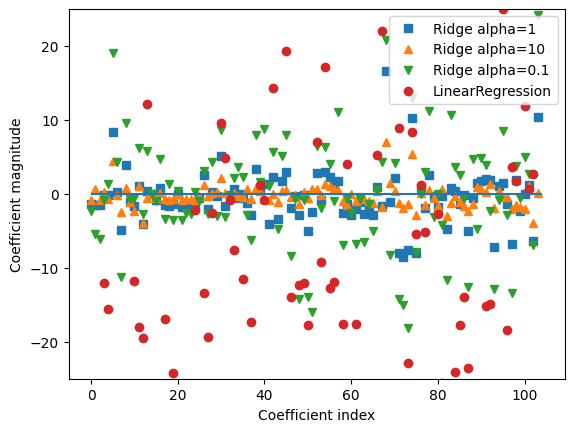

In [ ]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

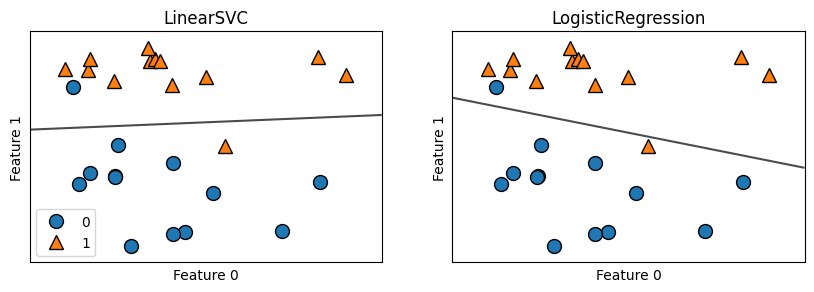

In [7]:
# perbandingan linierSVC dan regresi llogistik

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

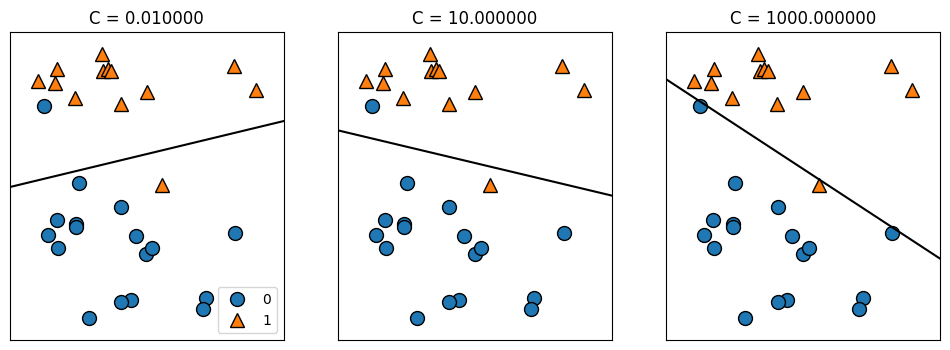

In [8]:
 mglearn.plots.plot_linear_svc_regularization()

In [13]:
# testing dengan data kangker payudara
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.948
Test set score: 0.951


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
